<a href="https://colab.research.google.com/github/waiyankyaw961999/Zomato-Restaurants/blob/main/Report_on_Bangalore_Restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Report on Bangalore Restaurants Data

Scraped raw dataset can be downloaded from the [Kaggle](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants).

Bangalore is the capital and third-largest city of the Indian state of Karnataka, which has a variety of ethnic people with different cultures and traditional dishes. Since it is the largest city in India, Bangalore has a population of over 8 million. It also has many food courts and eateries offering a wide array of dishes with colorful textures and various tastes.

In this Jupyter notebook, I will be going to discern the key patterns in the dataset for delivering insights and summaries.


If you want to check the up-to-date list of restaurants, go and check on [Zomato](https://www.zomato.com/).


In [1]:
import os
%cd /content/drive/MyDrive/Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle" 

/content/drive/MyDrive/Kaggle


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale = 2, rc = {"font.size": 15,"axes.titlesize": 15,"axes.labelsize": 20})   

In [3]:
raw_data = pd.read_csv('zomato.csv'); 

In [4]:
# To see the list of columns 
print(list(raw_data.columns))

['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


In [5]:
columns = raw_data.columns[1:17]
proc_data = raw_data[columns]
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   phone                        50509 non-null  object
 7   location                     51696 non-null  object
 8   rest_type                    51490 non-null  object
 9   dish_liked                   23639 non-null  object
 10  cuisines                     51672 non-null  object
 11  approx_cost(for two people)  51371 non-null  object
 12  reviews_list                 51717 non-null  object
 13  menu_item                    51

In [6]:
proc_data.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Unnecessary columns will be removed from the dataframe.

In [7]:
#For data analysis, we will drop unnecessary columns from dataframe.
drop_columns = ['phone','address','dish_liked','menu_item','location','reviews_list']
proc_data = proc_data.drop(proc_data.loc[:,drop_columns],axis=1)


In [8]:
proc_data['rate'] = proc_data['rate'].str.split('/').str.get(0)
proc_data.rate.replace(('NEW','-'),np.nan,inplace =True)
proc_data.rate = pd.to_numeric(proc_data['rate'],errors='coerce')



In [9]:
# Finding Duplicates
number_of_duplicate = proc_data.duplicated().sum()
print("Duplicates: " ,number_of_duplicate)

# remove duplicate
proc_data.drop_duplicates(keep = False,inplace=True)

Duplicates:  124


In [10]:
remove_index = []
for index_,j in enumerate(proc_data.online_order):
    if  j!= 'No' and j!= 'Yes':
        remove_index.append(index_)
proc_data.drop(index=remove_index,axis=1,inplace=True)

In [11]:
# Changing column names
proc_data.rename(columns={'approx_cost(for two people)': 'approx_cost_2P','listed_in(type)':'type','listed_in(city)':'city'}, inplace=True)
proc_data['approx_cost_2P'] = proc_data['approx_cost_2P'].str.replace(',',''); # replacing ',' in price

In [12]:
# Changing the data format from string to float 
proc_data['approx_cost_2P'] = pd.to_numeric(proc_data['approx_cost_2P'],errors='coerce')
# Fill na value with mean of price
price_means=proc_data['approx_cost_2P'].mean(skipna=True)
proc_data['approx_cost_2P'].fillna(price_means,inplace=True);
proc_data['approx_cost_2P'] = proc_data['approx_cost_2P'].astype(np.uint)

For rating, the 'Na' value is replaced with average rating value. 

For rest_type, the value will remain the same. 

For approx_cost, the 'Na' value is replaced with average cost. 


In [13]:
# replacing Na value with zero for empty votes 
proc_data['votes'] = proc_data['votes'].fillna(0)

In [14]:
data = proc_data.round(3)
data.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost_2P,type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Now, raw data with unnecessary data has been cleaned for exploratory data analysis. 

#Exploratory Data Analysis

Categorical data ('Yes' , 'No') will be selected to perform the early stage of visualization. Using bar chart, the data will be displaying depending on the on the type of booking system.

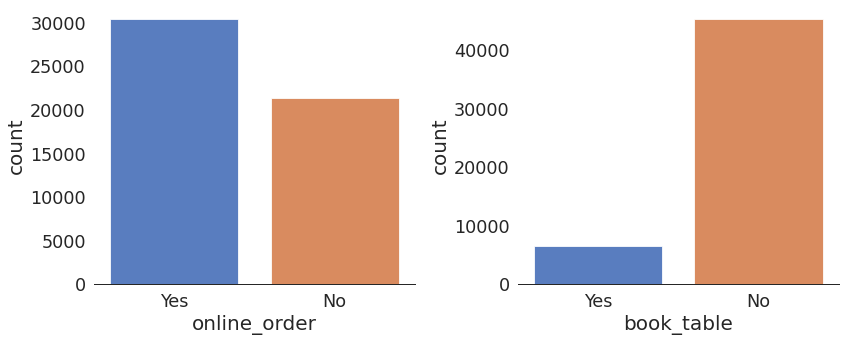

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2,figsize=(12,5));

sns.despine(left=True)
sns.countplot(data=data,x='online_order',ax=axes[0])
sns.countplot(data=data,x='book_table',ax=axes[1])
#sns.set_title('Comparison between Online Booking and Table Booking')
plt.tight_layout()

Comparison between two columns: 'online_order' & 'book_table' shows that the number of restaurants that you can order from online is exceedingly higher than the number of the booking. This shows that people prefer to order food with online booking instead of going to restaurants as they want to eat at their places.

Types of dishes or meals will be explored to find out what style of eating is popular in Bangalore. 

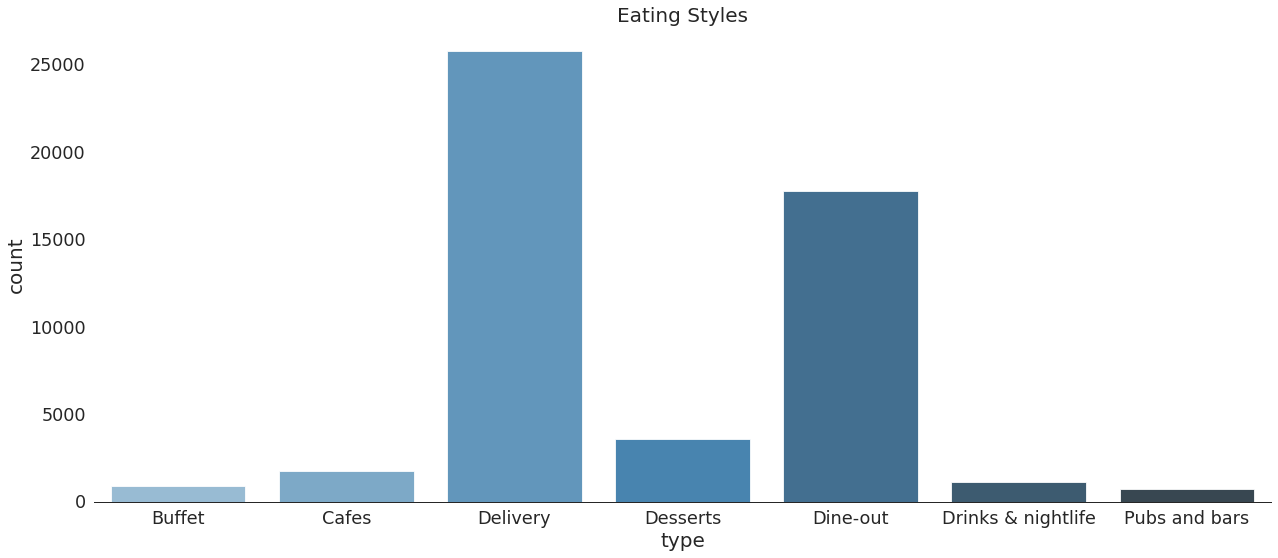

In [26]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,8))
sns.despine(left=True)
widthbars = 2
sns.countplot(data=data,x='type',palette="Blues_d",ax=ax)
ax.set_title('Eating Styles')
sns.set_context("paper", font_scale = 3, rc = {"font.size": 15,"axes.titlesize": 20,"axes.labelsize": 20})  

#sns.set_title('Comparison between Online Booking and Table Booking')
plt.tight_layout()

The above table also claims the first one depicting that people tend to order their food more than going outside. Other styles of eating habits are comparatively lower. According to the above figure, people in Bangalore don't spend much of their time at restaurants. Therefore, almost all restaurants offer delivery services for their customers.   

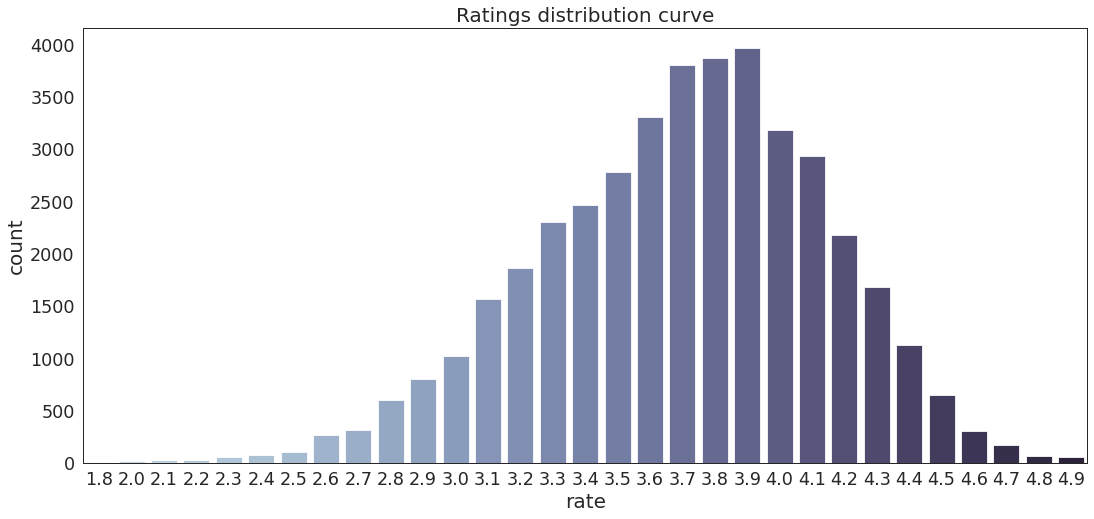

In [17]:
fig, ax = plt.subplots(figsize=(18,8))  
sns.countplot(x = data['rate'],ax=ax,palette="ch:s=.25,rot=-.25")
plt.title('Rating distribution curve');


From the above figure, the average number rating falls between 3.4 to 4.2. This means that over half of the restaurants in the city have proper services with their dishes and accomodations. When we start running our own restaurant, our new restaurants will highly likely to get a rating higher than 3.4. 

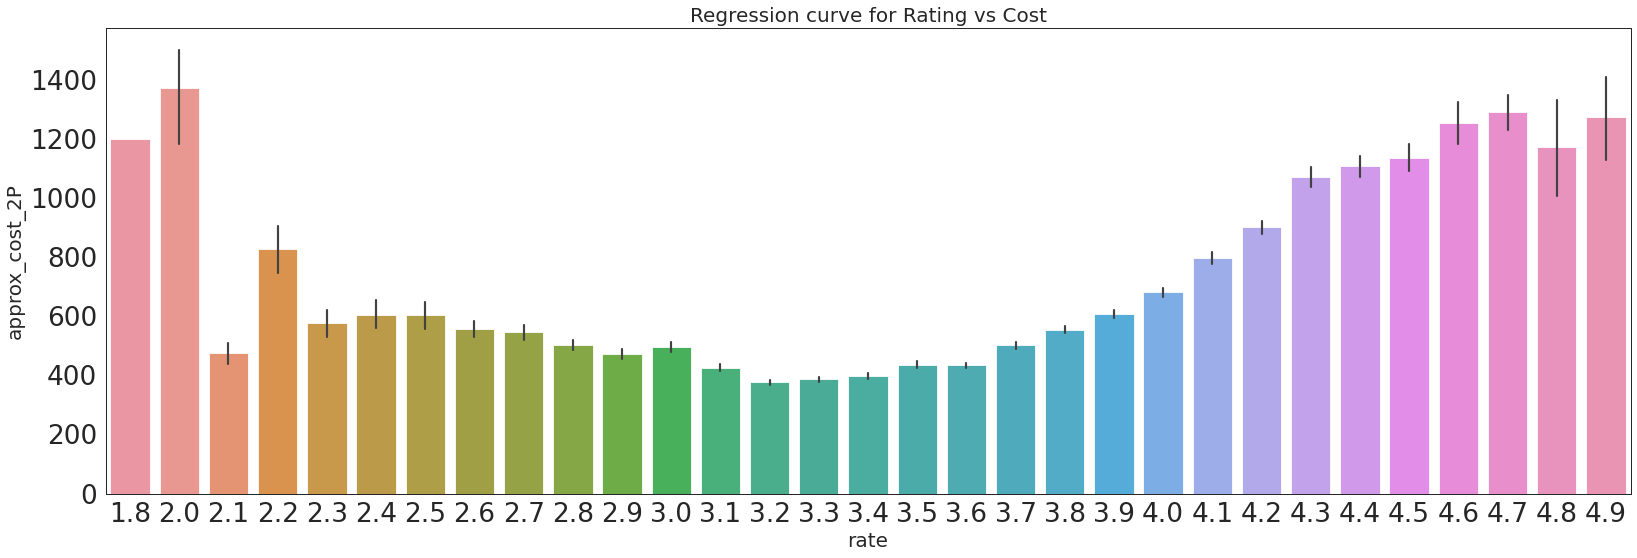

In [31]:
fig, ax = plt.subplots(figsize=(23,8))  
sns.barplot(x=data["rate"], y=data["approx_cost_2P"],ax=ax)
sns.set_context("paper", font_scale = 1, rc = {"font.size": 15,"axes.titlesize": 20,"axes.labelsize": 20})  
plt.title('Regression curve for Rating vs Cost');
plt.tight_layout()

The above figure depicts the number of ratings by approximate average cost. As you can see the average cost of 2 people is relatively higher at both ends. However, the average cost is significantly stable around the middle region between 2.9 to 3.8. Therefore, not only high-rated restaurants but also low-rated restaurants can cost you more than the average cost for two people. 

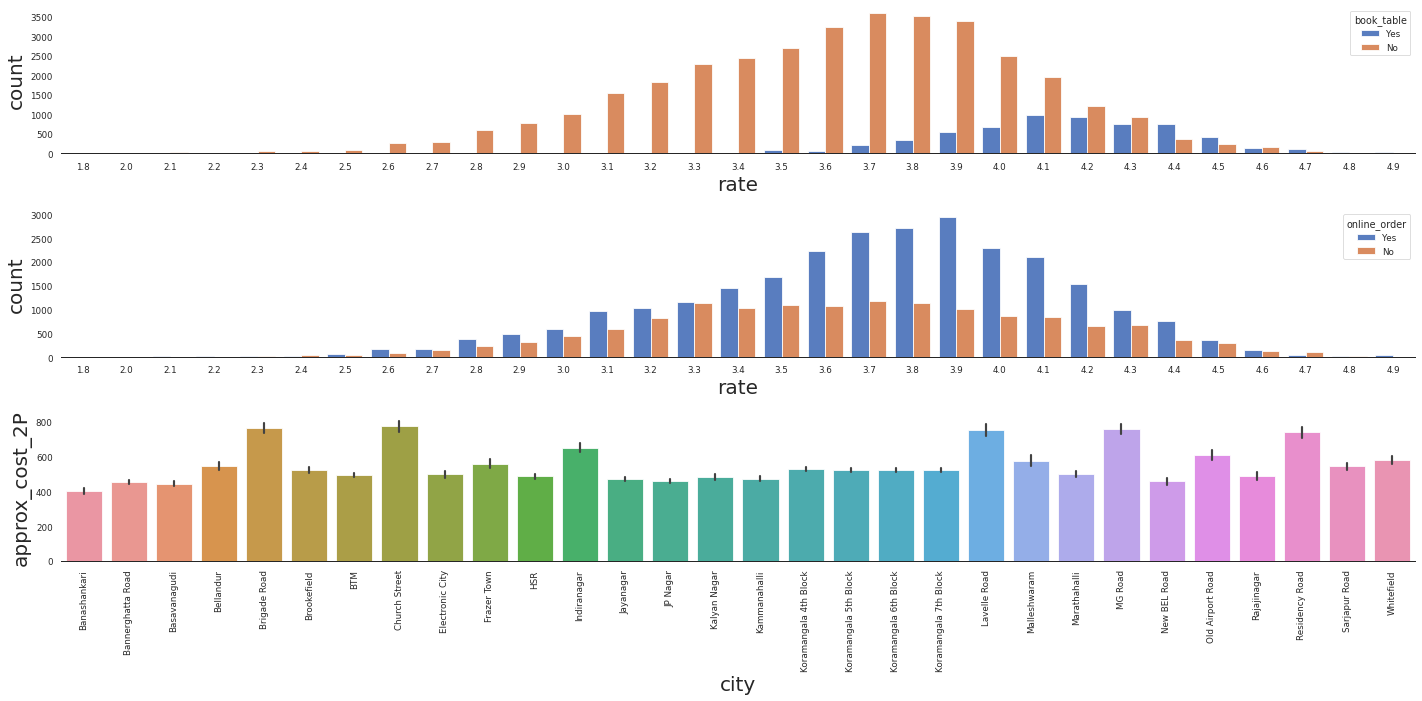

In [33]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1,figsize=(20,10));

sns.despine(left=True)
sns.countplot(x=data["rate"],hue=data["book_table"],ax=axes[0])
sns.countplot(x=data["rate"],hue=data["online_order"],ax=axes[1])
ax2=sns.barplot(x=data["city"], y=data["approx_cost_2P"],ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.tight_layout()

Type of order doesn't affect the rating for a particular restaurant. As you can see in the first two figures in the above image, there is no recorded rating in high-rated restaurants. Generally, many restaurants seem to accept online orders. Since the number of delivery is high, people prefer to order online. 

In [21]:
top_five_cuisines = data['cuisines'].value_counts()[:5]
top_five_cities = data['city'].value_counts()[:5]

frame = []
for x in list(top_five_cuisines.index):
  copy_data = data[data['cuisines'] == x]
  frame.append(copy_data)
top_cuisines = pd.concat(frame)

frame_1 = []
for y in list(top_five_cities.index):
  copy_data = top_cuisines[data['city'] == y]
  frame_1.append(copy_data)
top_rated_data = pd.concat(frame_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


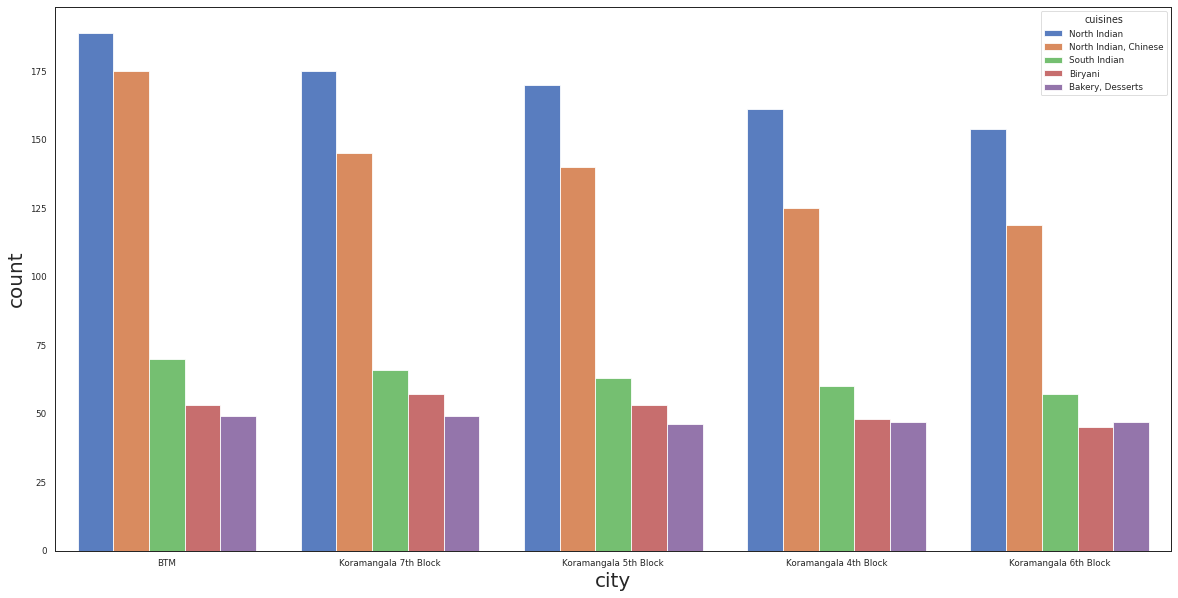

In [35]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.countplot(x='city',hue='cuisines',data=top_rated_data,ax=ax)

The top five cities with respect to the number of restaurants are listed in the above figure by the top five cuisines. In Bangalore, North Indian dishes take first place in a row, and North Indian and Chinese restaurants are second-most famous. From the above figure, we can conclude that people in Bangalore enjoy eating their Indian Style dishes. When we want to open our restaurants, we have to consider those kinds of dishes to sustain our income.

In [24]:
#fig, ax = plt.subplots(figsize=(25,10)) 
text= data['cuisines'].fillna('')
#text = list(text)
seperator = ','
text = seperator.join(text).replace(' ','').replace(',',' ')


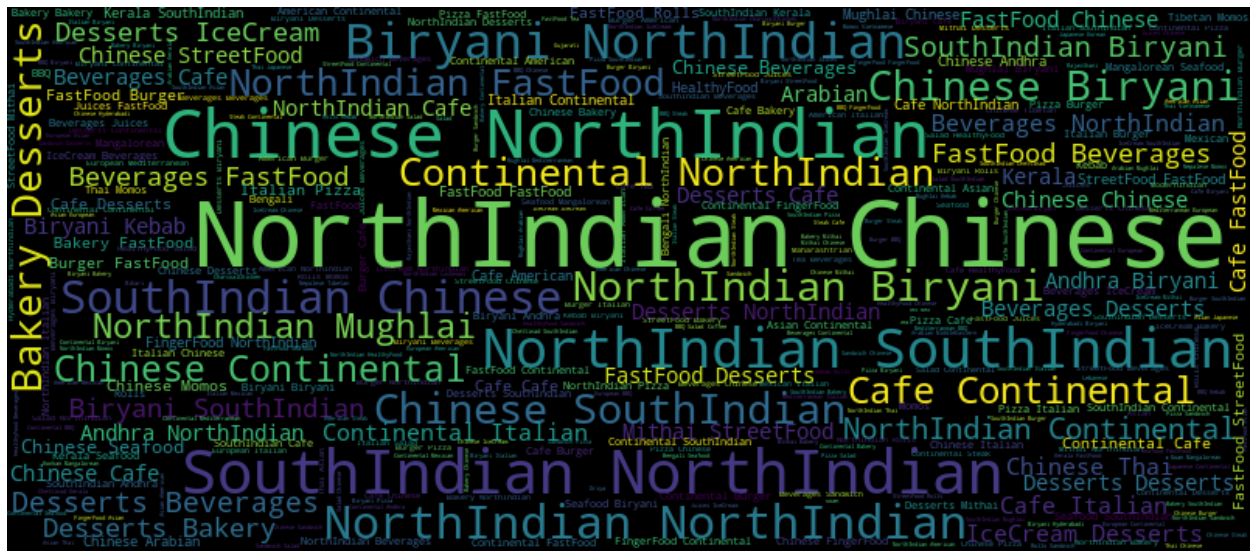

In [25]:
fig, ax = plt.subplots(figsize=(25,10)) 
wordcloud = WordCloud(max_words=2000,width=800, height=350, margin=0).generate(text)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
ax.margins(x=0, y=0)
plt.show()

In Word Could, you can also find out the most frequent number of dishes that the restaurants in Bangalore serve to their guests. 

#Conclusion

To conclude, we have found out that Bangalore's residences prefer online orders, and they don't enjoy spending much money on their food. Many restaurants serve Indian-style dishes which are neither expensive nor cheap. People don't usually care about the rating, and there are still many restaurants that haven't got votes for their services. BTM and Koramangla 7th, 6th, 5th, 4th cities have a large number of restaurants, and it can be a hurdle for other competitors. They should be considering the type of dishes and places to open. All in all, Bangalore people want to deliver food from their homes,therefore, there should be a delivery service for a restaurant. 

**I'd be much appreciated for your kind suggestions on my report. Always looking forward to recieve your ideas and constructive feedbacks.**